# BrightnessContrast Example

This example demonstrates usage of `brightness_contrast` operator.

## Brightness and Contrast Adjustment

Brightness and contrast can be adjusted using three parameters:

- `contrast` - makes the dark parts darker and bright parts brighter while keeping the gray (at half dynamic range of the input type) constant
- `brightness` - multiplies the intensities
- `brightness_shift` - shifts the pixel intensities

The formula is given as:

$$
Out = brightness\_shift \cdot {Max}_{out} + brightness \cdot ({contrast\_center} + {contrast} \cdot ({in} - {contrast\_center}))
$$

where ${contrast\_center}$ denotes a value that is unaffected by contrast changes; by default, it's at half of the input's dynamic range (e.g. 128 for `uint8`) and ${Max}_{out}$ is the maximum positive value of the output type (for integer types) or 1 (for floating point) - but it can also be specified as an argument for the operator.

The operator can be used to adjust contrast and brightness as well as to compute negative images (`brightness = -1`, `brightness_shift = 1`).

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import nvidia.dali.experimental.dynamic as ndd

image_dir = Path("../data/images")
image_path = next(image_dir.glob("**/*.jpg"))

In [2]:
def display(original: ndd.Tensor, converted: ndd.Tensor):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(original.cpu())
    ax[0].set_title("Original")
    ax[0].axis("off")
    ax[1].imshow(converted.cpu())
    ax[1].set_title("Adjusted")
    ax[1].axis("off")

## GPU Example: Color Inversion

Let's apply brightness/contrast adjustment on the GPU to create a color inversion effect. Setting `brightness=-1` and `brightness_shift=1` inverts the colors, while `contrast=1.5` increases the contrast.

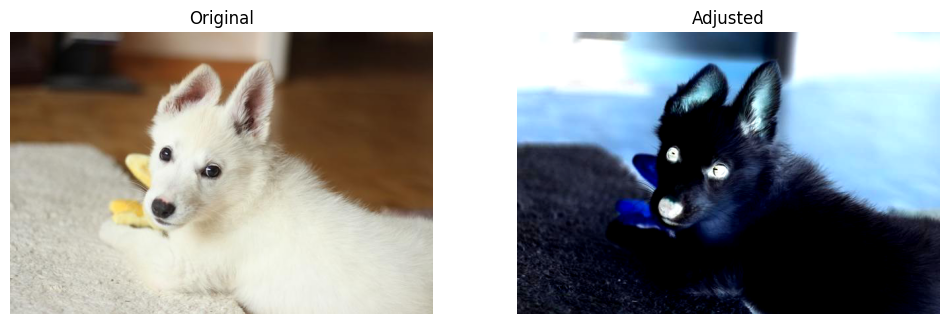

In [3]:
image = ndd.imread(image_path, device="gpu")
converted = ndd.brightness_contrast(
    image,
    contrast=1.5,
    brightness=-1,
    brightness_shift=1,
)
display(image, converted)

## CPU Example: Contrast and Brightness Adjustment

Now let's run on the CPU with different parameters. Here we reduce contrast (`contrast=0.4`) and shift brightness up (`brightness_shift=0.3`), with a custom contrast center point.

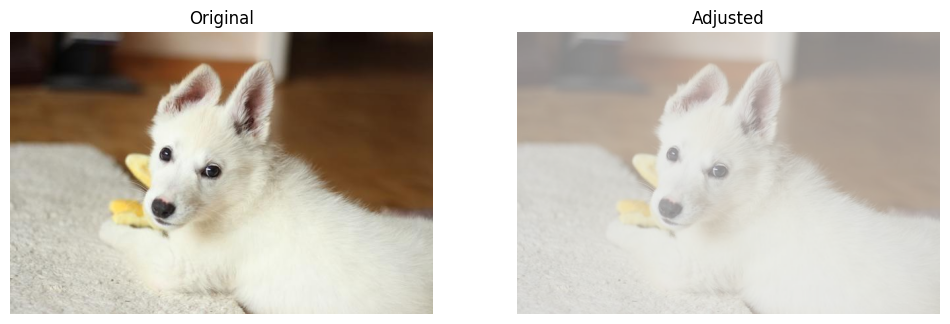

In [4]:
image_cpu = ndd.imread(image_path, device="cpu")
converted_cpu = ndd.brightness_contrast(
    image_cpu,
    brightness_shift=0.3,
    contrast=0.4,
    contrast_center=100,
)
display(image_cpu, converted_cpu)